## Milestone #1 - Term Project - Sherry Kosmicki

Many studies have been done to predict the tip amount of a restaurant sale based on the original food ticket price. I decided to look at other ways that tips may be able to be determined. I came across a dataset that gathered various variables when providing a delivery service. This data was gathered by a Chinese food delivery service in Charlston, South Carolina. The driver captured the following characteristics for each of his deliveries. 

Payment type: (C/R) - Cash or Credit  
Race: (W/B/L/A) - White/Black/Latino/Asian   
Type: (R/W/H/O) - Residence/Work/Hotel/Other   
Age: (Y/M/O) - Young/Middle/Old  

In addition to these variables, I have the address delivery location or street address in South Carolina, the tip amount, the price of the delivery, time-in, time-out, the time elapsed and the number of miles for the delivery.  

The goal is to focus on the tip amount and determine any variation related to the independent variables. It would be bonus information to determine if the address location can impact the tip amount. This would require determining the geo code of the addresses. Gathering income data in Charleston could present information about areas that are considered low versus high income and if that has an impact on the tip amount.  

As a restaurant owner I would ask myself how I could use this information. I would need to understand if these characteristics impact tips alone for the delivery drivers. Can the actions of a delivery driver impact their tips outside of these gathered variables? If we can gather data based on location, can that be the determining factor and for those areas that have low income with potentially lower tips, would those tips gathered in high income areas make up for the lower tip amount?  

I tried to find datasets from Uber Eats or Grub hub that gather this similar information without much luck. Based on the blind gathering of this data, I would imagine that a larger corporate delivery service would need to get permission from the customer to record such data.  

I hope to learn from this project the best way to handle missing data and to make predictions based on modeling the data.  

In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#check versions of packages
print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)

pandas version: 1.4.1
numpy version: 1.21.5


### Exploring the Data

In [3]:
#load all fields of Chopstick tip data into a dataframe
df_tip_all = pd.read_csv('chopsticks_data.csv')
#display the first few rows of data
df_tip_all.head()

,Street_Address,Date,Tip,Phone_Number,Street_Address2,Race,Gender,Type,Price,Payment_Type,Time_In,Time_Out,Age,Time_Elapsed,Miles
0,23 Kracke,7/5/2016,3.00,8.438056e+09,B,W,F,R,19.83,R,11:58,NaN,Y,NaN,2.5
1,145 Bee,6/29/2016,4.78,9.149805e+09,NaN,W,F,NaN,NaN,NaN,15:06,NaN,Y,NaN,1.6
2,Ashley River,7/7/2016,NaN,8.435063e+09,NaN,NaN,NaN,NaN,12.93,C,21:34,NaN,NaN,NaN,2.0
3,6 Grove Street,6/1/2016,3.67,NaN,NaN,B,M,R,NaN,NaN,16:30,NaN,NaN,NaN,1.7
4,6 Grove Street,6/28/2016,3.61,8.437938e+09,NaN,B,F,R,NaN,R,14:20,NaN,M,NaN,1.7


In [4]:
#display the dimensions of the dataframe
df_tip_all.shape

(772, 15)

## Observations  

1. the dataset has 772 rows and 15 columns  
2. Some of the columns will not be useful - Date, Phone_Number, Street_Address2  
3. There's a mix of numerical and categorical data
4. I will be evaluating the value of the tip column
5. I can create a binary value for the tip looking at those which there was 0 tip value - 0=No tip; 1=Yes tip

In [5]:
# Column data types
df_tip_all.dtypes

Street_Address      object
Date                object
Tip                float64
Phone_Number       float64
Street_Address2     object
Race                object
Gender              object
Type                object
Price              float64
Payment_Type        object
Time_In             object
Time_Out            object
Age                 object
Time_Elapsed       float64
Miles              float64
dtype: object

In [6]:
# look at descriptive statistics of numerical data
df_tip_all.describe()

,Tip,Phone_Number,Price,Time_Elapsed,Miles
count,671.000000,5.660000e+02,568.000000,457.000000,772.000000
mean,3.239911,7.092241e+09,17.867324,42.665208,1.230440
std,2.657423,4.315494e+09,8.558549,16.911390,0.657160
min,0.000000,2.098990e+06,4.420000,0.000000,0.175235
25%,2.000000,7.063615e+09,12.000000,31.000000,0.737291
50%,3.000000,8.434563e+09,15.580000,43.000000,1.071294
75%,4.200000,8.437367e+09,20.072500,55.000000,1.533305
max,22.770000,8.432152e+10,59.840000,90.000000,3.557515


In [7]:
# look at descriptive statistics of non-numerical data
df_tip_all.describe(include = ['O'])

,Street_Address,Date,Street_Address2,Race,Gender,Type,Payment_Type,Time_In,Time_Out,Age
count,772,772,210,663,663,584,624,715,462,481
unique,498,32,58,4,2,4,2,433,312,3
top,45 Courtenay,6/27/2016,A,W,F,R,C,12:40,13:20,Y
freq,18,58,55,429,347,387,314,7,8,248


## Missing Data
* There are NAs in several columns and I have to decide which rows I need to eliminate based on those NAs and which ones that I can provide the median.  
* The tip amount needs to be evaluated - I'm leaving 0 (zero) but removing the NAs

#### Histograms of the numerical data

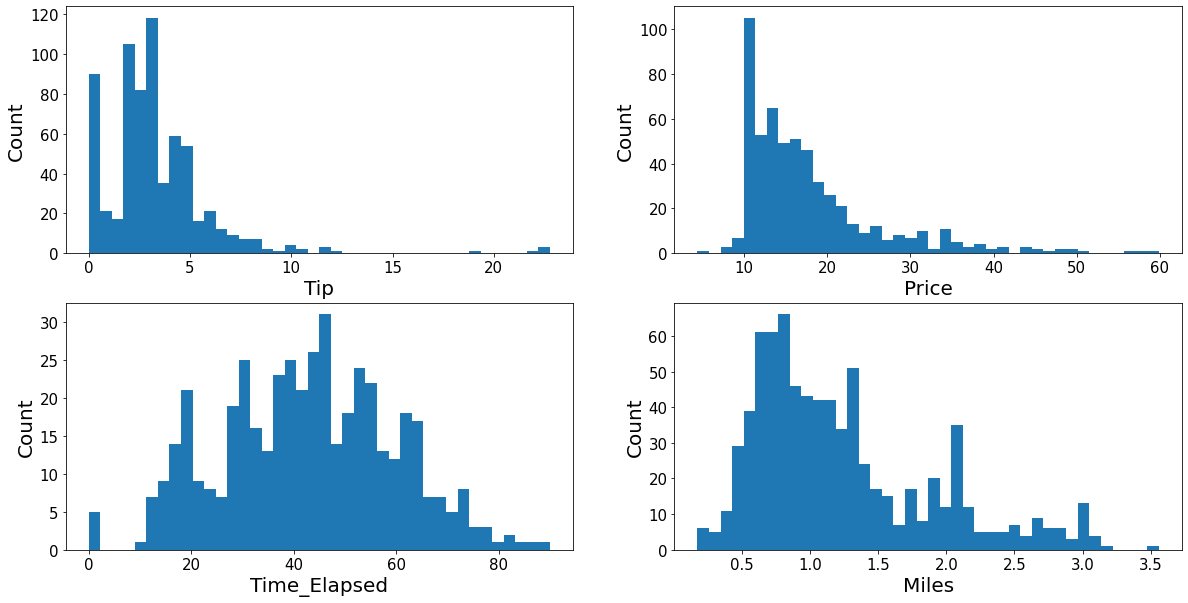

In [8]:
#set the figure size
plt.rcParams['figure.figsize'] = (20, 10)
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)
# Specify the features of interest
num_features = ['Tip', 'Price', 'Time_Elapsed', 'Miles']
xaxes = num_features
yaxes = ['Count', 'Count', 'Count', 'Count']
# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df_tip_all[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

#### Observations of histograms of numerical data  
1. The price variability is more than the tip amount  
2. Time elapsed seems evenly spread and I'm not certain yet if I will evaluate this against the tip info  
3. Miles just indicates to me that they stay within a certain radius

### Create bar charts of categorical data

In [9]:
#Create a copy of the dataframe for use with graphing
df_plots = df_tip_all.copy()
df_plots = df_plots.replace({'Race': {'W': 'White', 'B': 'Black', 'L': 'Latino', 'A': 'Asian'}})
df_plots = df_plots.replace({'Type': {'R': 'Home', 'W': 'Work', 'H': 'Hotel', 'O': 'Other'}})
df_plots = df_plots.replace({'Age': {'Y': 'Young', 'M': 'Middle', 'O': 'Old'}})

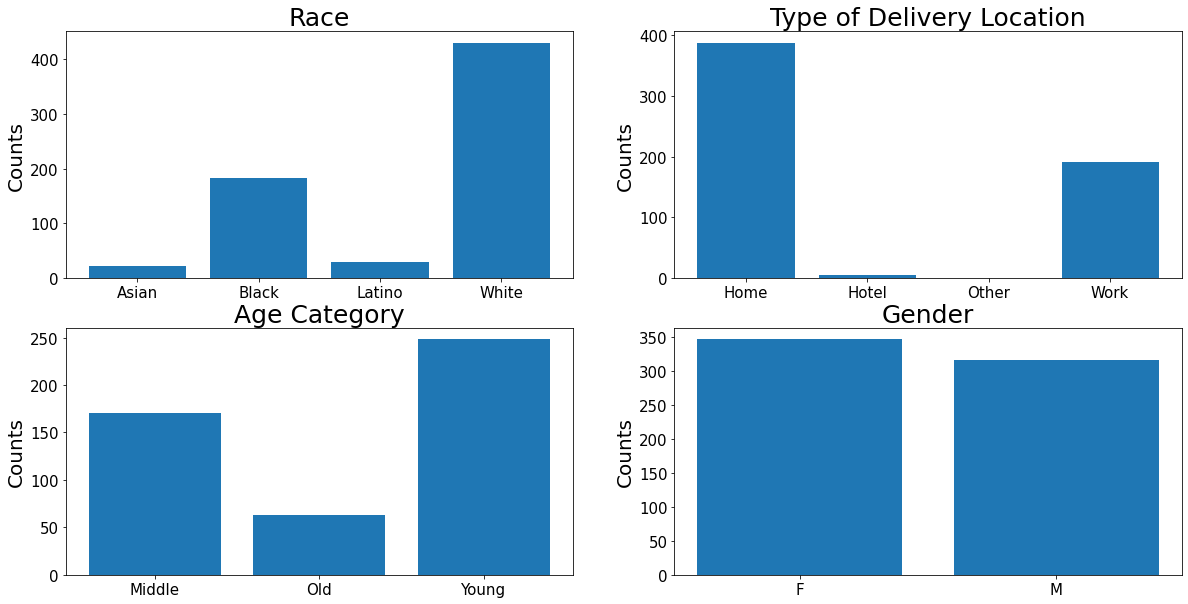

In [10]:
# %matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols= 2)

# Create the Race graph
X_race = df_plots.groupby('Race').size().reset_index(name='Counts')['Race']
Y_race = df_plots.groupby('Race').size().reset_index(name='Counts')['Counts']
# make the bar graph
axes[0,0].bar(X_race, Y_race)
axes[0,0].set_title('Race', fontsize=25)
axes[0,0].set_ylabel('Counts', fontsize=20)
axes[0,0].tick_params(axis='both', labelsize=15)

# Create the Type graph
X_type = df_plots.groupby('Type').size().reset_index(name='Counts')['Type']
Y_type = df_plots.groupby('Type').size().reset_index(name='Counts')['Counts']
# make the bar graph
axes[0,1].bar(X_type, Y_type)
axes[0,1].set_title('Type of Delivery Location', fontsize=25)
axes[0,1].set_ylabel('Counts', fontsize=20)
axes[0,1].tick_params(axis='both', labelsize=15)

# Create the Age graph
X_age = df_plots.groupby('Age').size().reset_index(name='Counts')['Age']
Y_age = df_plots.groupby('Age').size().reset_index(name='Counts')['Counts']
# make the bar graph
axes[1,0].bar(X_age, Y_age)
axes[1,0].set_title('Age Category', fontsize=25)
axes[1,0].set_ylabel('Counts', fontsize=20)
axes[1,0].tick_params(axis='both', labelsize=15)

# Create the Gender graph
X_gender = df_plots.groupby('Gender').size().reset_index(name='Counts')['Gender']
Y_gender = df_plots.groupby('Gender').size().reset_index(name='Counts')['Counts']
# make the bar graph
axes[1,1].bar(X_gender, Y_gender)
axes[1,1].set_title('Gender', fontsize=25)
axes[1,1].set_ylabel('Counts', fontsize=20)
axes[1,1].tick_params(axis='both', labelsize=15)

In [11]:
df_plots

,Street_Address,Date,Tip,Phone_Number,Street_Address2,Race,Gender,Type,Price,Payment_Type,Time_In,Time_Out,Age,Time_Elapsed,Miles
0,23 Kracke,7/5/2016,3.00,8.438056e+09,B,White,F,Home,19.83,R,11:58,NaN,Young,NaN,2.500000
1,145 Bee,6/29/2016,4.78,9.149805e+09,NaN,White,F,NaN,NaN,NaN,15:06,NaN,Young,NaN,1.600000
2,Ashley River,7/7/2016,NaN,8.435063e+09,NaN,NaN,NaN,NaN,12.93,C,21:34,NaN,NaN,NaN,2.000000
3,6 Grove Street,6/1/2016,3.67,NaN,NaN,Black,M,Home,NaN,NaN,16:30,NaN,NaN,NaN,1.700000
4,6 Grove Street,6/28/2016,3.61,8.437938e+09,NaN,Black,F,Home,NaN,R,14:20,NaN,Middle,NaN,1.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,21 George,7/8/2016,4.53,8.704185e+06,300,White,F,Home,NaN,NaN,18:54,NaN,Old,NaN,0.223704
768,35 St. Philip,7/8/2016,3.07,8.437232e+09,NaN,Black,F,Home,12.93,C,19:48,20:32,Old,44.0,0.203198
769,50 George,6/29/2016,2.47,2.247239e+09,NaN,White,F,NaN,NaN,NaN,NaN,NaN,Young,NaN,0.175235
770,50 George,6/27/2016,2.36,8.039172e+09,NaN,White,M,Home,15.64,C,19:37,20:25,Young,48.0,0.175235


### Graph analysis
1. The counts for each of the categories are not surprising and what I would expect for each of those variables.  

### Next steps
1. Cleaning up the data more, removing NA values and creating a binary column, removing unneeded columns  
2. Looking at geo code for the area  
3. Seeing if there is any specific median income I can add to the dataset related to location  
4. Looking closer at the tip values and the price values to see there relationships with the categorical data

## Milestone #2 - Term Project - Sherry Kosmicki

Goals for this Milestone:  
1. Drop any columns the will not be useful for analysis or model building, and explain why  
2. Deal with missing data and justify why and how to deal with it  
3. Create scatter plots of the various data points, plot regression line
4. Look for outliers  
5. Create a heat map
6. Create dummy variables as needed  
7. Determine what models I plan to use for this project and what features are needed

### 1. Drop any columns that will not be useful for analysis or model building, and explain why

In [12]:
# Review columns to determine which ones to remove that have no value for the project
# Column data types
df_tip_all.dtypes

Street_Address      object
Date                object
Tip                float64
Phone_Number       float64
Street_Address2     object
Race                object
Gender              object
Type                object
Price              float64
Payment_Type        object
Time_In             object
Time_Out            object
Age                 object
Time_Elapsed       float64
Miles              float64
dtype: object

In [13]:
# Create new dataset and remove the following columns that do not have a relationship with the tip amount
# Phone_Number, Street_Address2, Payment_Type

In [14]:
df_tip_v1 = df_tip_all.drop(columns=['Phone_Number', 'Street_Address2', 'Payment_Type'])

In [15]:
df_tip_v1.dtypes

Street_Address     object
Date               object
Tip               float64
Race               object
Gender             object
Type               object
Price             float64
Time_In            object
Time_Out           object
Age                object
Time_Elapsed      float64
Miles             float64
dtype: object

### 2. Deal with missing data and justify why and how to deal with it  

In [16]:
df_tip_v1.shape

(772, 12)

In [17]:
# Reviewing NA values in all the columns
df_tip_v1.isna().sum()

Street_Address      0
Date                0
Tip               101
Race              109
Gender            109
Type              188
Price             204
Time_In            57
Time_Out          310
Age               291
Time_Elapsed      315
Miles               0
dtype: int64

#### For column missing values, I plan to replace NAs as follows:  
For Tip and Price I plan to replace NAs with the mean value for the column.  
For Race, Gender, Type, Age - I plan to replace NAs with the mode value in the column.

In [18]:
# Determine median value of current Tip values
median_tip=df_tip_v1['Tip'].median()
median_tip

3.0

In [19]:
# Replace missing values in Tip with new median calculation
df_tip_v1['Tip'] = df_tip_v1['Tip'].replace(np.nan, median_tip)
# Review replacement
df_tip_v1['Tip'].isna().sum()

0

In [20]:
# Determine median value of current Price values
median_price=df_tip_v1['Price'].median()
median_price

15.58

In [21]:
# Replace missing values in Tip with new median calculation
df_tip_v1['Price'] = df_tip_v1['Price'].replace(np.nan, median_price)
# Review replacement
df_tip_v1['Price'].isna().sum()

0

In [22]:
# Determine mode value of Race, Gender, Type, Age
mode_race = df_tip_v1['Race'].mode()
print('Race mode:', mode_race)
mode_gender = df_tip_v1['Gender'].mode()
print('Gender mode:', mode_gender)
mode_type = df_tip_v1['Type'].mode()
print('Type mode:', mode_type)
mode_age = df_tip_v1['Age'].mode()
print('Age mode:', mode_age)

Race mode: 0    W
Name: Race, dtype: object
Gender mode: 0    F
Name: Gender, dtype: object
Type mode: 0    R
Name: Type, dtype: object
Age mode: 0    Y
Name: Age, dtype: object


In [23]:
# Replace missing values in Tip with new median calculation
df_tip_v1['Race'].fillna('W',inplace=True)
df_tip_v1['Gender'].fillna('F',inplace=True)
df_tip_v1['Type'].fillna('R',inplace=True)
df_tip_v1['Age'].fillna('Y',inplace=True)
# Review replacement
df_tip_v1.isna().sum()

Street_Address      0
Date                0
Tip                 0
Race                0
Gender              0
Type                0
Price               0
Time_In            57
Time_Out          310
Age                 0
Time_Elapsed      315
Miles               0
dtype: int64

#### At this time I'm not going to clean Time_In, Time_Out, Time_Elapsed - there is basically no Time_Elapsed value if the Time_Out is not populated. I'm not sure yet if I can find any value to use it in relationship to the tip or price amounts

### 3. Create scatter plots of the various data points, plot regression line

In [24]:
#Create a copy of the dataframe for use with graphing after removing missing data so I can create scatter plot looks
df_plots_v1 = df_tip_v1.copy()
df_plots_v1 = df_plots_v1.replace({'Race': {'W': 'White', 'B': 'Black', 'L': 'Latino', 'A': 'Asian'}})
df_plots_v1 = df_plots_v1.replace({'Type': {'R': 'Home', 'W': 'Work', 'H': 'Hotel', 'O': 'Other'}})
df_plots_v1 = df_plots_v1.replace({'Age': {'Y': 'Young', 'M': 'Middle', 'O': 'Old'}})

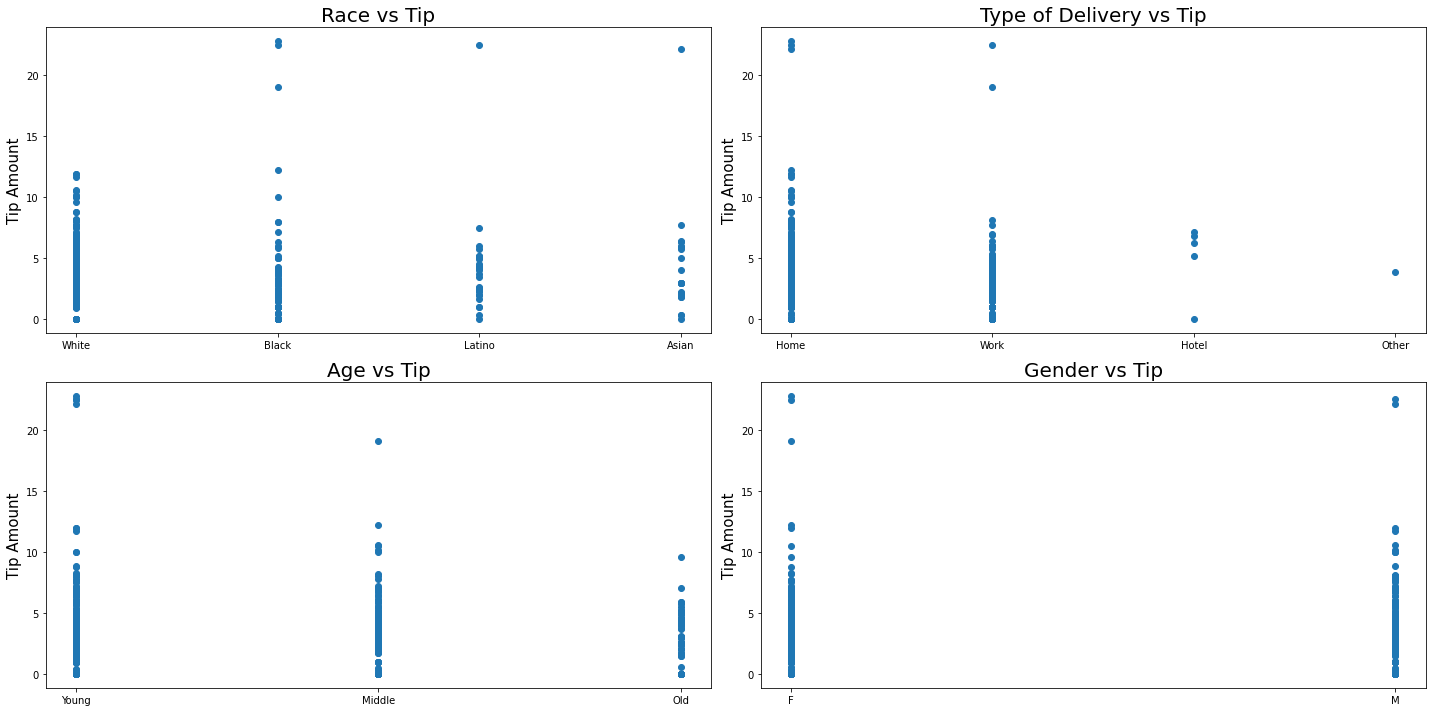

In [25]:
fig, axes= plt.subplots(nrows=2, ncols=2)

# Create a Race scatter plot compared to tip amount
axes[0][0].scatter(df_plots_v1['Race'], df_plots_v1['Tip'])
axes[0][0].set_title("Race vs Tip", fontsize=20)
axes[0][0].set_ylabel('Tip Amount', fontsize=15)

# Create a Type of Delivery scatter plot compared to tip amount
axes[0][1].scatter(df_plots_v1['Type'], df_plots_v1['Tip'])
axes[0][1].set_title("Type of Delivery vs Tip", fontsize=20)
axes[0][1].set_ylabel('Tip Amount', fontsize=15)

# Create an Age scatter plot compared to tip amount
axes[1][0].scatter(df_plots_v1['Age'], df_plots_v1['Tip'])
axes[1][0].set_title("Age vs Tip", fontsize=20)
axes[1][0].set_ylabel('Tip Amount', fontsize=15)

# Create a Gender scatter plot compared to tip amount
axes[1][1].scatter(df_plots_v1['Gender'], df_plots_v1['Tip'])
axes[1][1].set_title("Gender vs Tip", fontsize=20)
axes[1][1].set_ylabel('Tip Amount', fontsize=15)

plt.tight_layout()
plt.show()

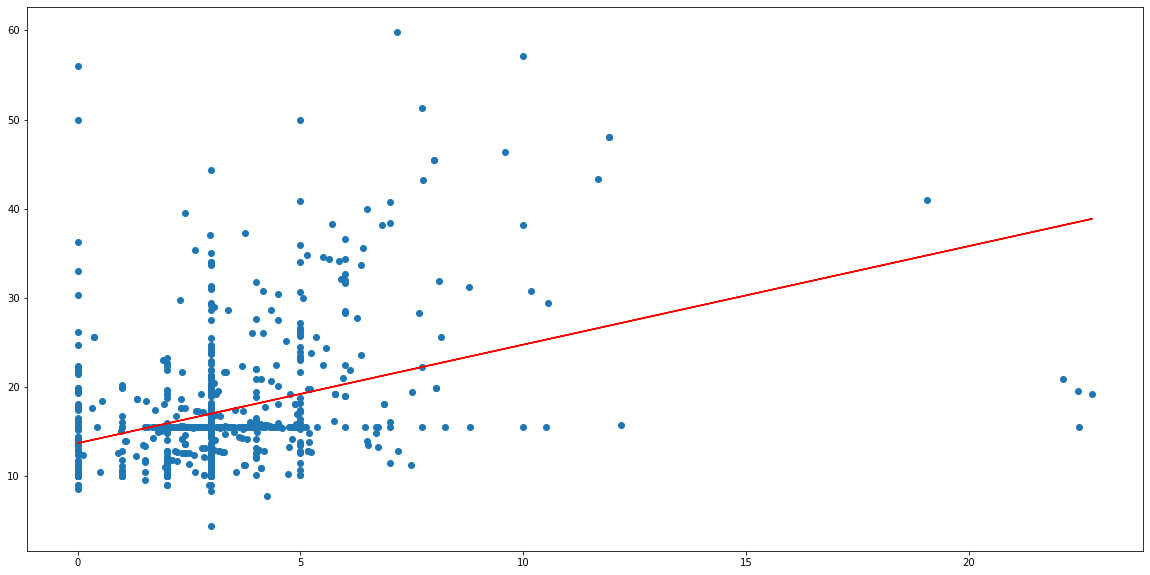

In [26]:
# Create a scatter plot of Tip vs. Price and add a regression line
# Import needed library
from scipy.stats import linregress

x = df_tip_v1['Tip']
y = df_tip_v1['Price']

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

plt.scatter(x, y)
plt.plot(x, m * x + b, color="red")   # I've added a color argument here


plt.show()

Text(0, 0.5, 'Dollars')

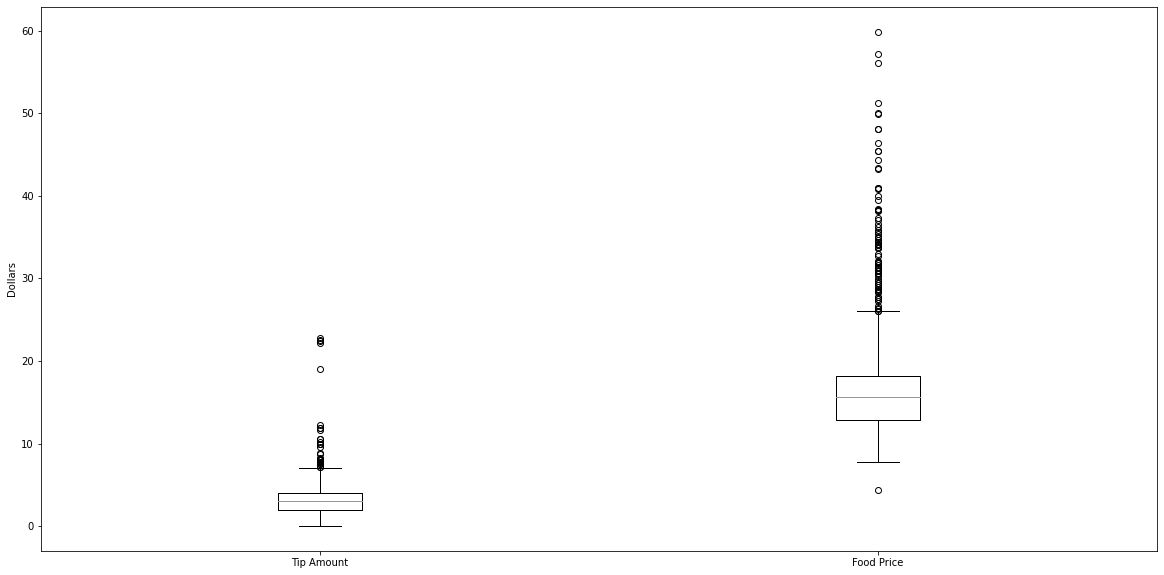

In [27]:
# Created a box and whisker look to see if outliers could be determined
plot_tip = df_plots_v1['Tip']
plot_price = df_plots_v1['Price']

columns = [plot_tip, plot_price]

plt.boxplot(columns)
plt.xticks([1,2], ["Tip Amount", "Food Price"])
plt.ylabel("Dollars")

### As far as outliers, I can really only make that call for the tip amount and food price. The time values would have to be evaluated for outliers if I were to use them in the dataset. Although I have some values in the scatter plot that show a large food price a very little tip amount, those can be valid values.

### 5. Create dummy variables

In [28]:
# Create dummy variables for independent variable Race
dummy_race = pd.get_dummies(df_tip_v1['Race'], prefix='race')
dummy_race.head()

,race_A,race_B,race_L,race_W
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0


In [29]:
# Creating v2 to populate the dummy variables and add the race dummy variables to the dataframe
df_tip_v2 = pd.concat([df_tip_v1, dummy_race], axis=1)

In [30]:
# Check it
df_tip_v2.shape

(772, 16)

In [31]:
# Create dummy variables for independent variable Type of Delivery H=Hotel, R=Home, O=Other, W=Work
dummy_tod = pd.get_dummies(df_tip_v1['Type'], prefix='TOD')
dummy_tod.head()

,TOD_H,TOD_O,TOD_R,TOD_W
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [32]:
# Add Type dummy variables to tip v2 dataframe
df_tip_v2 = pd.concat([df_tip_v2, dummy_tod], axis=1)

In [33]:
df_tip_v2.shape

(772, 20)

In [34]:
# Create dummy variables for independent variable Age M=Middle, O=Old, Y=Young
dummy_age = pd.get_dummies(df_tip_v1['Age'], prefix='Age')
dummy_age.head()

,Age_M,Age_O,Age_Y
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0


In [35]:
# Add Age dummy variables to tip v2 dataframe
df_tip_v2 = pd.concat([df_tip_v2, dummy_age], axis=1)

In [36]:
df_tip_v2.shape

(772, 23)

In [37]:
# Create dummy variables for independent variable Gender M=Male, F=Female
dummy_gen = pd.get_dummies(df_tip_v1['Gender'], prefix='Gen')
dummy_gen.head()

,Gen_F,Gen_M
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0


In [38]:
# Add Gender dummy variables to tip v2 dataframe
df_tip_v2 = pd.concat([df_tip_v2, dummy_gen], axis=1)

In [39]:
df_tip_v2.shape

(772, 25)

#### I was extremely careful with that step, when I started out I added one dummy variable 3 times while I was inquiring on the dataframe in the same window as I was doing the concat method.  Lesson learned.

## Observations

When comparing tip amount to categorical variables:  
1. Gender shows no variance - fairly equal  
2. White people tip at a consistent amount  
3. There's a small amount of variability in a black persons tip amount  
4. Majority of the deliveries are to a home  
5. Age ranges of services are to young and middle aged individuals  

Regression line shows a positive regression which indicates with an increase in food price, the tip amount increases

### Next Steps

1. Create a heat map  
2. Prepare for data modeling - split the data  
3. Correlation coefficient matrix and/or visualization  
4. Perform Linear Regression  
5. Evaluate accuracy, R2 score


### I would entertain any input from you professor on the best ways to evaluate this data. Since I don't have many features, I'm not sure it's worth transforming those. Engineering new useful features may be something for me to think about. 

### After looking at the next two milestones I will be looking at ways to enhance my data to provide additional modeling features. Wish me luck!

## Milestone #3

I decided to do some reasearch on if there is a standard for tipping restaurant deliveries.  
I was able to pull the following from this referenced website:  
https://www.cnbc.com/2019/07/25/how-much-to-tip-when-you-order-food-on-a-delivery-app.html#:~:text=Other%20sources%20support%20that%20conclusion,according%20to%20U.S.%20Foods'%20report.  

Customers and deliverers agree that a tip should be around \\$4 for a typical order, according to a recent study from U.S. Foods, a foodservice distributor, which asked customers and food deliverers how they feel about using apps like Grubhub and UberEats, with an emphasis on tipping. Other sources support that conclusion: Consumer Reports notes that \\$3 to \\$5 is standard, or around 20% of the total bill, whichever is higher. On average, customers were willing to pay a maximum of \\$8.50 for the tip, delivery fee and service fee combined, according to U.S. Foods’ report. However, it’s worth noting that the delivery apps themselves can eat up a large chunk of that \\$8.50, leaving little to the food deliverers.  

Base on this finding, I'm going to determine which tips where 20% of the food price and mark those with a Y and N for those that did not in a column of its own.

In [40]:
df_tip_v2.head()

,Street_Address,Date,Tip,Race,Gender,Type,Price,Time_In,Time_Out,Age,...,race_W,TOD_H,TOD_O,TOD_R,TOD_W,Age_M,Age_O,Age_Y,Gen_F,Gen_M
0,23 Kracke,7/5/2016,3.00,W,F,R,19.83,11:58,NaN,Y,...,1,0,0,1,0,0,0,1,1,0
1,145 Bee,6/29/2016,4.78,W,F,R,15.58,15:06,NaN,Y,...,1,0,0,1,0,0,0,1,1,0
2,Ashley River,7/7/2016,3.00,W,F,R,12.93,21:34,NaN,Y,...,1,0,0,1,0,0,0,1,1,0
3,6 Grove Street,6/1/2016,3.67,B,M,R,15.58,16:30,NaN,Y,...,0,0,0,1,0,0,0,1,0,1
4,6 Grove Street,6/28/2016,3.61,B,F,R,15.58,14:20,NaN,M,...,0,0,0,1,0,1,0,0,1,0


In [41]:
df_tip_v2['tip_20p'] = np.where(df_tip_v2['Tip']/df_tip_v2['Price']>=.20, 1, 0)
df_plots_v1['tip_20p'] = np.where(df_plots_v1['Tip']/df_tip_v2['Price']>=.20, 1, 0)

In [42]:
df_tip_v2.head()

,Street_Address,Date,Tip,Race,Gender,Type,Price,Time_In,Time_Out,Age,...,TOD_H,TOD_O,TOD_R,TOD_W,Age_M,Age_O,Age_Y,Gen_F,Gen_M,tip_20p
0,23 Kracke,7/5/2016,3.00,W,F,R,19.83,11:58,NaN,Y,...,0,0,1,0,0,0,1,1,0,0
1,145 Bee,6/29/2016,4.78,W,F,R,15.58,15:06,NaN,Y,...,0,0,1,0,0,0,1,1,0,1
2,Ashley River,7/7/2016,3.00,W,F,R,12.93,21:34,NaN,Y,...,0,0,1,0,0,0,1,1,0,1
3,6 Grove Street,6/1/2016,3.67,B,M,R,15.58,16:30,NaN,Y,...,0,0,1,0,0,0,1,0,1,1
4,6 Grove Street,6/28/2016,3.61,B,F,R,15.58,14:20,NaN,M,...,0,0,1,0,1,0,0,1,0,1


#### I'm also going to add a column of data based on information I gathered from the U.S. Census Bureau on median income in the Charleston, SC area based on race.  
* White 88,353  
* Black 37,181  
* Asian 50,820  
* Latino 75,612

In [43]:
# create a list of our conditions for looking at the Race field
conditions = [
    (df_tip_v2['Race'] == 'W'),
    (df_tip_v2['Race'] == 'A'),
    (df_tip_v2['Race'] == 'L'),
    (df_tip_v2['Race'] == 'B')
    ]

# create a list of the values we want to assign for each condition
values = [88353, 50820, 75612, 37181]

# create a new column and use np.select to assign values to it using our lists as arguments
df_tip_v2['median_inc'] = np.select(conditions, values)

In [44]:
df_tip_v2.head()

,Street_Address,Date,Tip,Race,Gender,Type,Price,Time_In,Time_Out,Age,...,TOD_O,TOD_R,TOD_W,Age_M,Age_O,Age_Y,Gen_F,Gen_M,tip_20p,median_inc
0,23 Kracke,7/5/2016,3.00,W,F,R,19.83,11:58,NaN,Y,...,0,1,0,0,0,1,1,0,0,88353
1,145 Bee,6/29/2016,4.78,W,F,R,15.58,15:06,NaN,Y,...,0,1,0,0,0,1,1,0,1,88353
2,Ashley River,7/7/2016,3.00,W,F,R,12.93,21:34,NaN,Y,...,0,1,0,0,0,1,1,0,1,88353
3,6 Grove Street,6/1/2016,3.67,B,M,R,15.58,16:30,NaN,Y,...,0,1,0,0,0,1,0,1,1,37181
4,6 Grove Street,6/28/2016,3.61,B,F,R,15.58,14:20,NaN,M,...,0,1,0,1,0,0,1,0,1,37181


I'm going to create stackable charts to show the categories along with whether or not the tip was more or less than 20%

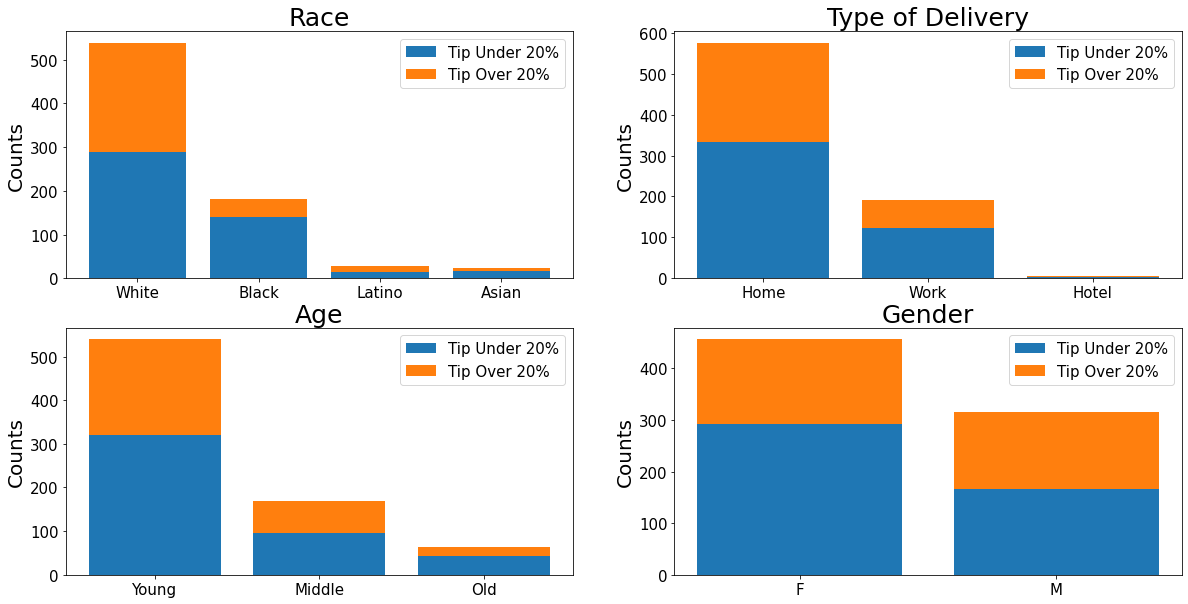

In [45]:
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer for Race column
Race_tip20_more = df_plots_v1[df_plots_v1['tip_20p']==1]['Race'].value_counts()
Race_tip20_less = df_plots_v1[df_plots_v1['tip_20p']==0]['Race'].value_counts()
Race_tip20_less = Race_tip20_less.reindex(index = Race_tip20_more.index)
# make the bar plot in position 0,0
p1 = axes[0, 0].bar(Race_tip20_less.index, Race_tip20_less.values)
p2 = axes[0, 0].bar(Race_tip20_more.index, Race_tip20_more.values, bottom=Race_tip20_less.values)
axes[0, 0].set_title('Race', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Tip Under 20%', 'Tip Over 20%'), fontsize = 15)

# make the data read to feed into the visulizer for Type of Delivery column
Type_tip20_more = df_plots_v1[df_plots_v1['tip_20p']==1]['Type'].value_counts()
Type_tip20_less = df_plots_v1[df_plots_v1['tip_20p']==0]['Type'].value_counts()
Type_tip20_less = Type_tip20_less.reindex(index = Type_tip20_more.index)
# make the bar plot in position 0,1
p1 = axes[0, 1].bar(Type_tip20_less.index, Type_tip20_less.values)
p2 = axes[0, 1].bar(Type_tip20_more.index, Type_tip20_more.values, bottom=Type_tip20_less.values)
axes[0, 1].set_title('Type of Delivery', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p1[0], p2[0]), ('Tip Under 20%', 'Tip Over 20%'), fontsize = 15)

# make the data read to feed into the visulizer for Age column
Age_tip20_more = df_plots_v1[df_plots_v1['tip_20p']==1]['Age'].value_counts()
Age_tip20_less = df_plots_v1[df_plots_v1['tip_20p']==0]['Age'].value_counts()
Age_tip20_less = Age_tip20_less.reindex(index = Age_tip20_more.index)
# make the bar plot in position 1,0
p1 = axes[1, 0].bar(Age_tip20_less.index, Age_tip20_less.values)
p2 = axes[1, 0].bar(Age_tip20_more.index, Age_tip20_more.values, bottom=Age_tip20_less.values)
axes[1, 0].set_title('Age', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p1[0], p2[0]), ('Tip Under 20%', 'Tip Over 20%'), fontsize = 15)

# make the data read to feed into the visulizer for Gender column
Gen_tip20_more = df_plots_v1[df_plots_v1['tip_20p']==1]['Gender'].value_counts()
Gen_tip20_less = df_plots_v1[df_plots_v1['tip_20p']==0]['Gender'].value_counts()
Gen_tip20_less = Gen_tip20_less.reindex(index = Gen_tip20_more.index)
# make the bar plot in position 1,1
p1 = axes[1, 1].bar(Gen_tip20_less.index, Gen_tip20_less.values)
p2 = axes[1, 1].bar(Gen_tip20_more.index, Gen_tip20_more.values, bottom=Gen_tip20_less.values)
axes[1, 1].set_title('Gender', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
axes[1, 1].legend((p1[0], p2[0]), ('Tip Under 20%', 'Tip Over 20%'), fontsize = 15)

plt.show()

## Observations
1. Looking at the categories where people tip over 20%, it appears it's about 50/50 for whites and latinos in the race category.  
2. In delivery type, we see large tips to those that were delivered to at home.  
3. The Younger or Middle aged tend to tip over 20% and lastly the males tend to tip 20% more so than females.

In [46]:
# Creating a dataframe for my heat map
df_tip_heat_map = df_tip_v2.drop(['Street_Address','Date', 'Race', 'Gender', 'Type', 'Time_In', 'Time_Out', 'Age', 'Time_Elapsed', 'Miles'], axis=1)
df_tip_heat_map.reset_index(drop=True, inplace=True)

In [47]:
df_tip_heat_map.head()

,Tip,Price,race_A,race_B,race_L,race_W,TOD_H,TOD_O,TOD_R,TOD_W,Age_M,Age_O,Age_Y,Gen_F,Gen_M,tip_20p,median_inc
0,3.00,19.83,0,0,0,1,0,0,1,0,0,0,1,1,0,0,88353
1,4.78,15.58,0,0,0,1,0,0,1,0,0,0,1,1,0,1,88353
2,3.00,12.93,0,0,0,1,0,0,1,0,0,0,1,1,0,1,88353
3,3.67,15.58,0,1,0,0,0,0,1,0,0,0,1,0,1,1,37181
4,3.61,15.58,0,1,0,0,0,0,1,0,1,0,0,1,0,1,37181


In [48]:
# Import more libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics

In [49]:
# Just keeping this code incase I want to look back at using iloc
#X_features = df_tip_heat_map.iloc[:, :7].values
#Y_target = df_tip_heat_map.iloc[:, -1:].values

Text(0.5, 1.0, 'Multi-Collinearity of Delivery Tip Attributes')

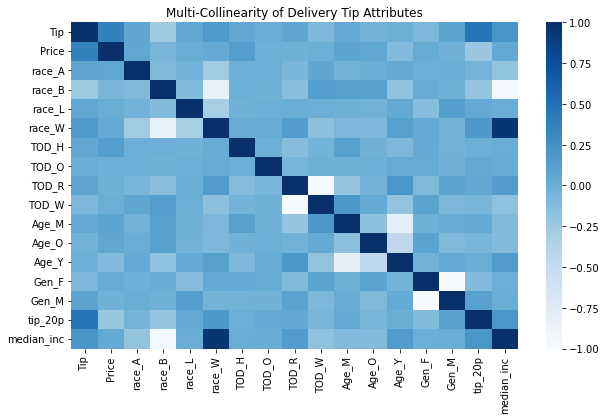

In [50]:
# created a heatmap to create a correlation of the data to compare with mpg
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df_tip_heat_map.corr(), center=0, cmap='Blues')
ax.set_title('Multi-Collinearity of Delivery Tip Attributes')

### Observations
1. There's a high correlation between median income and white race relative to tip over 20%  
2. The actual tip amount is showing some correlation with determining the tip amount over 20%  
3. Price also has an impact on the independent variable

### Prepare the Data for Modeling

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
# splitting the data into training and testing dataframes
# creating X and y
X = df_tip_heat_map.loc[:, df_tip_heat_map.columns != 'tip_20p']
y = df_tip_heat_map['tip_20p']

In [53]:
# Splitting the variables as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, 
                                                    test_size = 0.2, random_state = 0)

In [54]:
y_train.shape

(617,)

### Create a Linear Regression Model with tip amount and price

In [55]:
# Create X and y values from the training data to test linear regression on Tip and Price
X_lr = X_train['Price']
X_lr = np.array(X_lr).reshape((-1, 1))
y_lr = X_train['Tip']

In [56]:
X_lr.shape

(617, 1)

In [57]:
lr_model = LinearRegression()

In [58]:
lr_model.fit(X_lr, y_lr)

LinearRegression()

In [59]:
# Get results of Linear Regression
lr_r_sq = lr_model.score(X_lr, y_lr)
print('coefficient of determiniation:', lr_r_sq)

coefficient of determiniation: 0.14316149023708247


Observation - the coefficient of determiniation is 14% which means the price is not a good predictor of tip amount and it's not a good fit for this model.

### Create a Multiple Linear Regression Model

In [60]:
# Create X and y values from the training data to test multiple linear regression on tip vs. all other variables
X_mlr = X_train.iloc[:, :7].values
y_mlr = y_train.values

In [61]:
mlr_model = LinearRegression().fit(X_mlr, y_mlr)

In [62]:
# Get results of Multiple Linear Regression
mlr_r_sq = mlr_model.score(X_mlr, y_mlr)
print('coefficient of determination:', mlr_r_sq)

coefficient of determination: 0.4215794518381051


In [63]:
print('intercept:', mlr_model.intercept_)

intercept: 0.5341846955603669


In [64]:
print('slope:', mlr_model.coef_)

slope: [ 0.12577028 -0.0324617  -0.12566578 -0.02668983  0.10834998  0.04400563
  0.16514258]


The coefficient of determination is 42% which is much better using the other variables than linear regression.

### Create Logistic Regression Model

In [65]:
#import logistic regression model
from sklearn.linear_model import LogisticRegression

#import evaluation tools
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

In [66]:
#instantiate the logistic regression model 
logr_model = LogisticRegression(max_iter = 500)
#fit the model to the training set
logr = logr_model.fit(X_train, y_train)

Model Accuracy: 73.55%


C:\Users\kozfa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


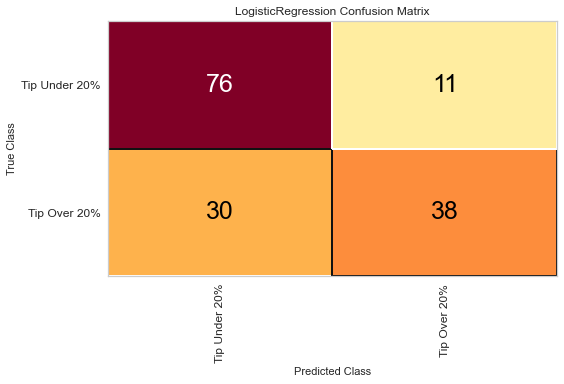

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [70]:
#get model accuracy and create a confusion matrix

#create class labels for confusion matrix
#classes = ['Did Not Survive','Survived']
label_encoder = {0: 'Tip Under 20%', 1: 'Tip Over 20%'}

#initialize the confusion matrix
cm = ConfusionMatrix(logr_model, encoder = label_encoder,  percent=False)

#fit the test set to the confusion matrix
cm.fit(X_test, y_test)

#creates the confusion matrix and gets the accuracy
mod_acc = 100*cm.score(X_test, y_test)
print('Model Accuracy: ', round(mod_acc,2), '%', sep = '')

#change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(25)

#display the confusion matrix
cm.show()

C:\Users\kozfa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


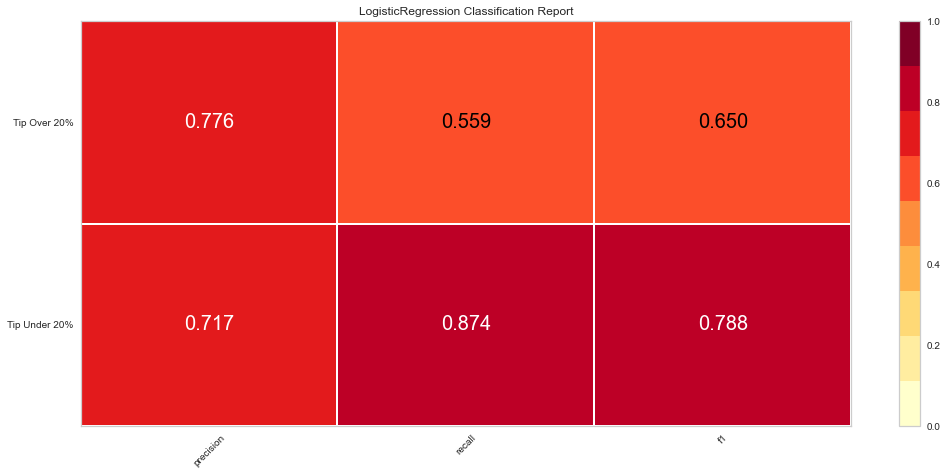

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [71]:
#get precision, recall, and F1-score from the classification report
#set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

#instantiate the classification report
class_report = ClassificationReport(logr_model, encoder = label_encoder)

#fit the classification report to the test data
class_report.fit(X_train, y_test)  
#evaluate the model on the test data
class_report.score(X_test, y_test)  
class_report.show()

C:\Users\kozfa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


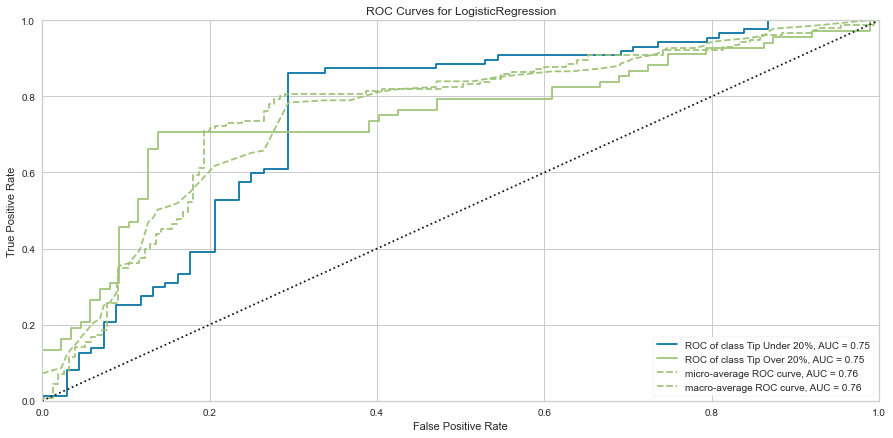

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [72]:
# ROC and AUC
#Instantiate the visualizer
roc_curve = ROCAUC(logr_model, encoder = label_encoder, solver = 'liblinear')

#fit the ROC curve to the test data
roc_curve.fit(X_test, y_test)
#evaluate the model on the test data
roc_curve.score(X_test, y_test)  
roc_curve.show()

## Create KNN Classifier

In [73]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier

In [74]:
knn = KNeighborsClassifier(n_neighbors=5)

In [75]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [76]:
knn.predict(X_test)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0])

In [77]:
# Calculate the accuracy of the model
print(knn.score(X_test, y_test))

0.896774193548387


Well, that accuracy is good! 89%